In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import re
from datetime import datetime
import seaborn as sns
from sklearn.preprocessing import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE, mutual_info_regression
from sklearn.model_selection import train_test_split


import tensorflow as tf
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import minepy

In [2]:
# DATAFRAME READ
preprocessed_data = pd.read_csv('preprocessed.csv', header=0) # 1000 ROWS
num_preprocessed = preprocessed_data.copy()

location_mapping = {
    0 : 'Rural',
    1 : 'Suburban',
    2 : 'Urban'
}

heat_mapping = {
    0 : 'Oil',
    1 : 'Electric',
    2 : 'Gas'
}

preprocessed_data['Location'] = preprocessed_data['Location'].map(location_mapping)
preprocessed_data['HeatingType'] = preprocessed_data['HeatingType'].map(heat_mapping)

## EDA

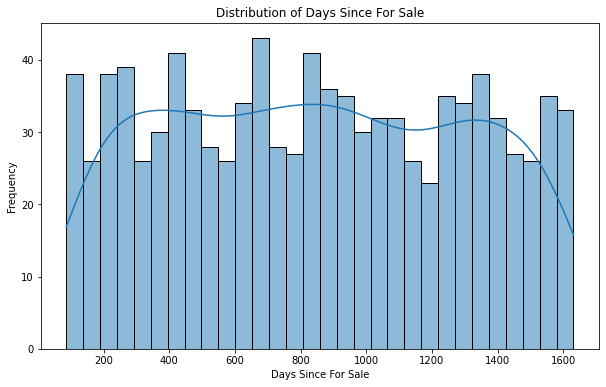

In [3]:
# DAYSINCEFORSALE VISUALIZATION
# -------------------------------------
# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(preprocessed_data['DaysSinceForSale'], bins=30, kde=True)
plt.title('Distribution of Days Since For Sale')
plt.xlabel('Days Since For Sale')
plt.ylabel('Frequency')
plt.show()

In [4]:
# DETECTING OUTLIERS
# -------------------------------------
# Using the IQR method
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

# Get 
outliers = (detect_outliers_iqr(preprocessed_data['Price'])) | (detect_outliers_iqr(preprocessed_data['SquareFootageHouse']))



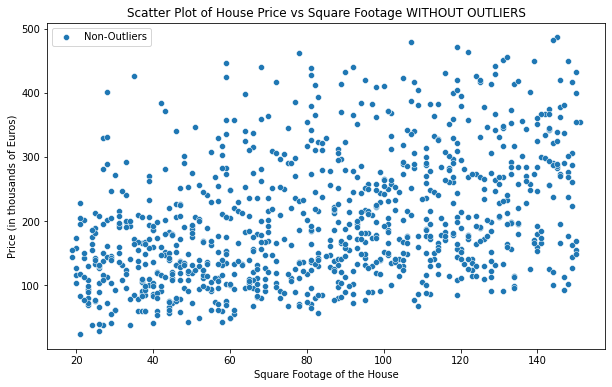

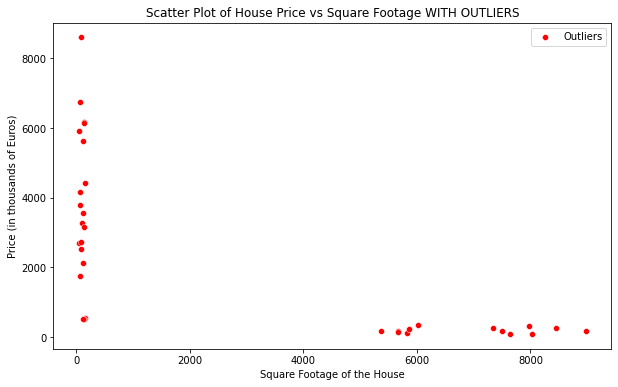

In [5]:
# OUTLIERS VISUALIZATION
# -------------------------------------

# Separate the data into outliers and non-outliers
outliers_data = preprocessed_data[outliers]
non_outliers_data = preprocessed_data[~outliers]

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=non_outliers_data['SquareFootageHouse'], y=non_outliers_data['Price'], label='Non-Outliers')
plt.title('Scatter Plot of House Price vs Square Footage WITHOUT OUTLIERS')
plt.xlabel('Square Footage of the House')
plt.ylabel('Price (in thousands of Euros)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=outliers_data['SquareFootageHouse'], y=outliers_data['Price'], color='r', label='Outliers')
plt.title('Scatter Plot of House Price vs Square Footage WITH OUTLIERS')
plt.xlabel('Square Footage of the House')
plt.ylabel('Price (in thousands of Euros)')
plt.legend()
plt.show()


In [6]:
# DATA NORMALIZATION MIN-MAX
# -------------------------------------
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(preprocessed_data[['SquareFootageHouse', 'Price']])

normalized_df = pd.DataFrame(normalized_data)

print("Normalized DataFrame:")
print(normalized_df)


Normalized DataFrame:
            0         1
0    0.012054  0.037608
1    0.012277  0.047327
2    0.008929  0.025620
3    0.011942  0.041299
4    0.009152  0.026306
..        ...       ...
967  0.014286  0.010269
968  0.011272  0.010195
969  0.013170  0.027794
970  0.011942  0.024545
971  0.004353  0.002110

[972 rows x 2 columns]


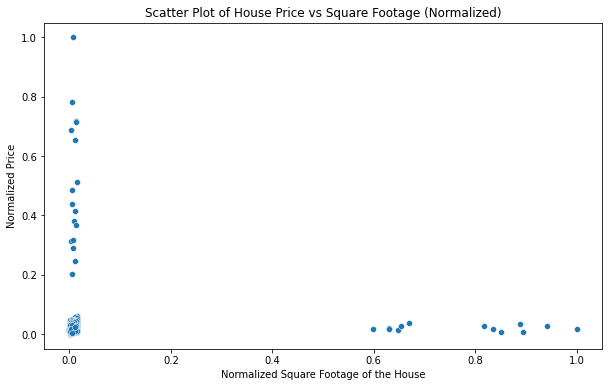

In [7]:
# DATA NORMALIZATION PLOTING
# -------------------------------------
# Plotting the scatter plot
plt.figure(figsize=(10, 6))

sns.scatterplot(x=normalized_df[0], y=normalized_df[1])
plt.title('Scatter Plot of House Price vs Square Footage (Normalized)')
plt.xlabel('Normalized Square Footage of the House')
plt.ylabel('Normalized Price')
plt.show()

In [8]:
# UNIVARIATE ANALYSIS
# -------------------------------------
# Summary Statistics
print(preprocessed_data.describe())



         Bedrooms   Bathrooms  SquareFootageHouse         Age  PoolQuality  \
count  972.000000  972.000000          972.000000  972.000000   972.000000   
mean     1.622428    1.595679          175.894033   38.319959    -0.467078   
std      0.960835    0.956361          801.996268   21.944352     0.937790   
min      0.000000    0.000000           19.000000    0.000000    -1.000000   
25%      1.000000    1.000000           52.000000   24.000000    -1.000000   
50%      1.000000    1.000000           86.000000   43.000000    -1.000000   
75%      2.000000    2.000000          118.000000   56.000000     0.000000   
max      5.000000    5.000000         8979.000000   71.000000     2.000000   

       HasPhotovoltaics  HasFiberglass  IsFurnished  HasFireplace  \
count        972.000000     972.000000   972.000000    972.000000   
mean           0.180041       0.387860     0.709877      0.003086   
std            0.384420       0.487513     0.454053      0.055498   
min            0.0000

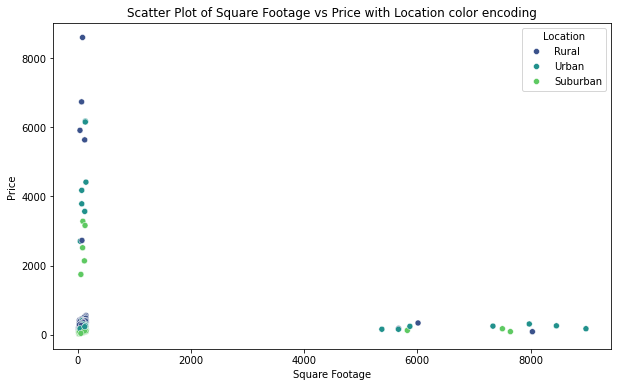

In [9]:
# BIVARIATE ANALYSIS
# -------------------------------------

# SquareFootageHouse vs Price vs Location visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=preprocessed_data['SquareFootageHouse'], y=preprocessed_data['Price'], hue=preprocessed_data['Location'], palette='viridis')
plt.title('Scatter Plot of Square Footage vs Price with Location color encoding')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.show()

C:\Users\Pepe\AppData\Local\Temp\ipykernel_504\1069543169.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=non_outliers_data['SquareFootageHouse'].loc[(non_outliers_data['Location'] == location)],
C:\Users\Pepe\AppData\Local\Temp\ipykernel_504\1069543169.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=non_outliers_data['SquareFootageHouse'].loc[(non_outliers_data['Location'] == location)],
C:\Users\Pepe\AppData\Local\Temp\ipykernel_504\1069543169.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=non_outliers_data['SquareFootageHouse'].loc[(non_outliers_data['Location'] == location)],


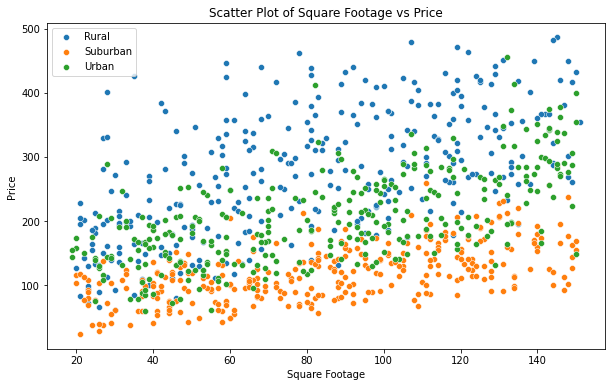

In [10]:
# BIVARIATE ANALYSIS
# -------------------------------------

# SquareFootageHouse vs Price vs Location visualization (jose mod)
colors = ['r', 'g', 'b']
plt.figure(figsize=(10, 6))
for location in location_mapping.values():
    sns.scatterplot(x=non_outliers_data['SquareFootageHouse'].loc[(non_outliers_data['Location'] == location)],
            y=non_outliers_data['Price'].loc[(non_outliers_data['Location'] == location)], palette='viridis',label=location)
    
plt.title(f'Scatter Plot of Square Footage vs Price')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.legend()
plt.show()

C:\Users\Pepe\AppData\Local\Temp\ipykernel_504\3906716823.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=non_outliers_data['Age'].loc[(non_outliers_data['Location'] == location)],
C:\Users\Pepe\AppData\Local\Temp\ipykernel_504\3906716823.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=non_outliers_data['Age'].loc[(non_outliers_data['Location'] == location)],
C:\Users\Pepe\AppData\Local\Temp\ipykernel_504\3906716823.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=non_outliers_data['Age'].loc[(non_outliers_data['Location'] == location)],


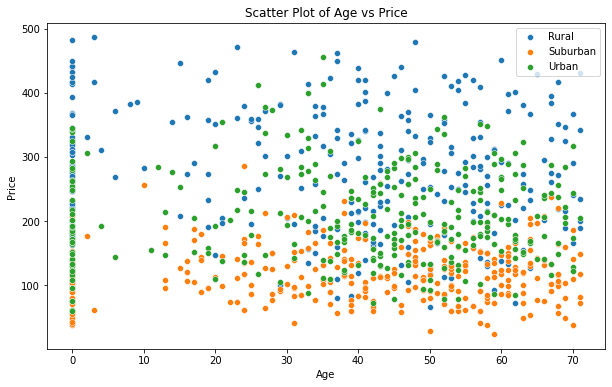

In [11]:
plt.figure(figsize=(10, 6))
for location in location_mapping.values():
    sns.scatterplot(x=non_outliers_data['Age'].loc[(non_outliers_data['Location'] == location)],
            y=non_outliers_data['Price'].loc[(non_outliers_data['Location'] == location)], palette='viridis',label=location)
    
plt.title(f'Scatter Plot of Age vs Price')
plt.xlabel('Age')
plt.ylabel('Price')
plt.legend()
plt.show()

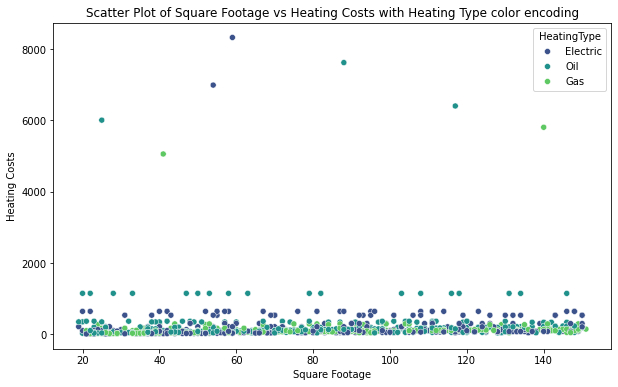

In [12]:
# MULTIVARIATE ANALYSIS
# -------------------------------------

# SquareFootageHouse vs Heating cost vs Heating type
plt.figure(figsize=(10, 6))
sns.scatterplot(x=non_outliers_data['SquareFootageHouse'], y=non_outliers_data['HeatingCosts'], hue=non_outliers_data['HeatingType'], palette='viridis')
plt.title('Scatter Plot of Square Footage vs Heating Costs with Heating Type color encoding')
plt.xlabel('Square Footage')
plt.ylabel('Heating Costs')
plt.show()

C:\Users\Pepe\AppData\Local\Temp\ipykernel_504\508791700.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pearson_matrix = preprocessed_data_copy.corr()


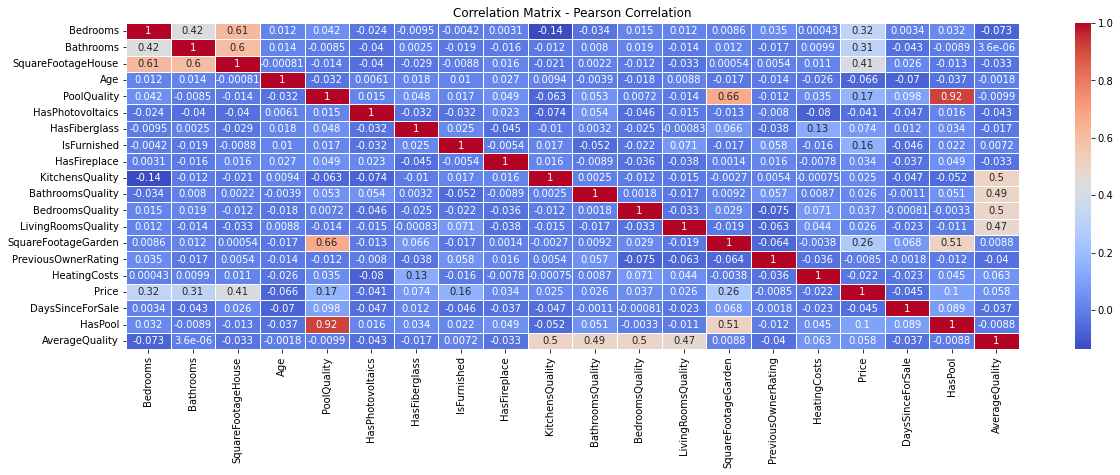

C:\Users\Pepe\AppData\Local\Temp\ipykernel_504\508791700.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pearson_matrix = preprocessed_data_copy.corr(method='kendall')


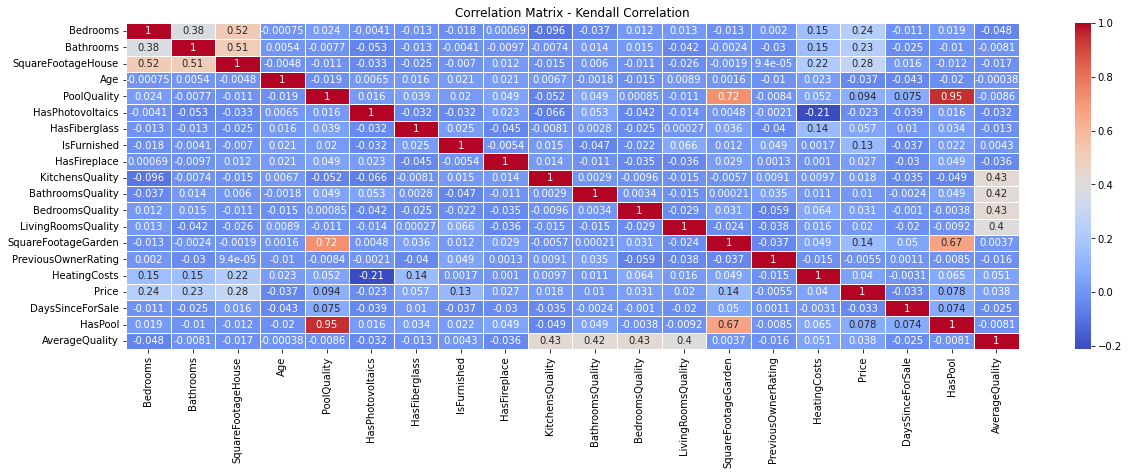

C:\Users\Pepe\AppData\Local\Temp\ipykernel_504\508791700.py:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pearson_matrix = preprocessed_data_copy.corr(method='spearman')


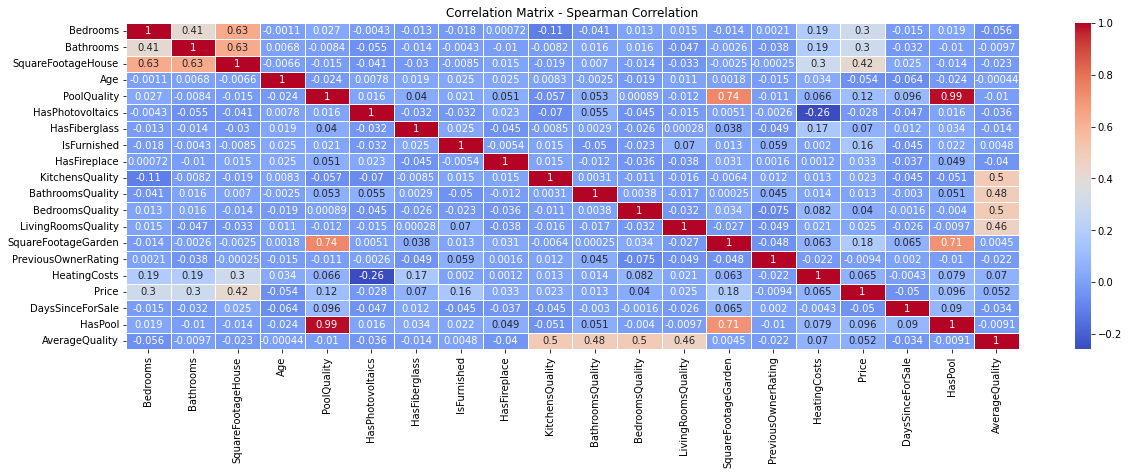

In [13]:
#CHECKING FOR MULTICOLINEARITY

preprocessed_data_copy = non_outliers_data.copy(deep=True)

#Using Pearson Correlation - Linear
pearson_matrix = preprocessed_data_copy.corr()
plt.figure(figsize=(20, 6))
sns.heatmap(pearson_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix - Pearson Correlation')
plt.show()


#Using Kendall Correlation

pearson_matrix = preprocessed_data_copy.corr(method='kendall')
plt.figure(figsize=(20, 6))
sns.heatmap(pearson_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix - Kendall Correlation')
plt.show()


#Using Spearman Correlation

pearson_matrix = preprocessed_data_copy.corr(method='spearman')
plt.figure(figsize=(20, 6))
sns.heatmap(pearson_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix - Spearman Correlation')
plt.show()



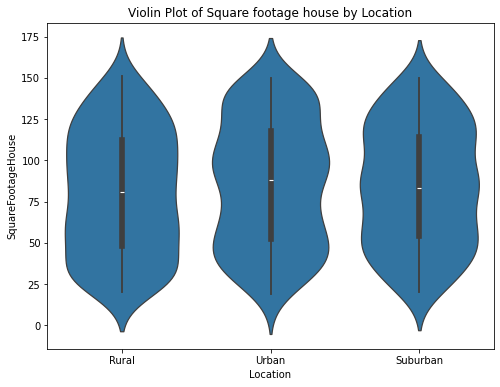

In [14]:
#BIVARIATE ANALYSIS - VIOLING PLOT
# Location x Square Footage House


plt.figure(figsize=(8, 6))
sns.violinplot(x='Location', y='SquareFootageHouse', data=non_outliers_data)
plt.title('Violin Plot of Square footage house by Location')

plt.show()


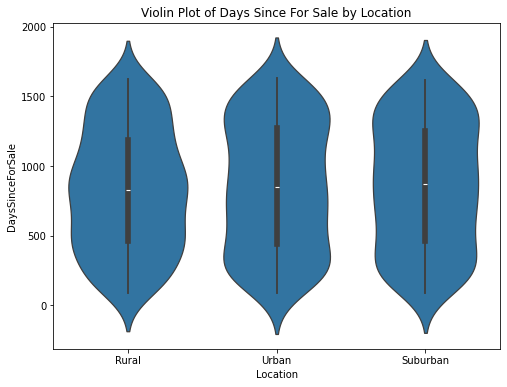

In [15]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Location', y='DaysSinceForSale', data=non_outliers_data)
plt.title('Violin Plot of Days Since For Sale by Location')

plt.show()


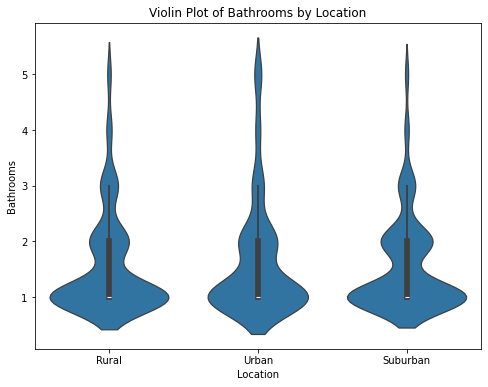

In [16]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Location', y='Bathrooms', data=non_outliers_data)
plt.title('Violin Plot of Bathrooms by Location')

plt.show()


C:\Users\Pepe\AppData\Local\Temp\ipykernel_504\3655237237.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='HeatingType', y='Frequency', data=location_freq, palette='Set3')


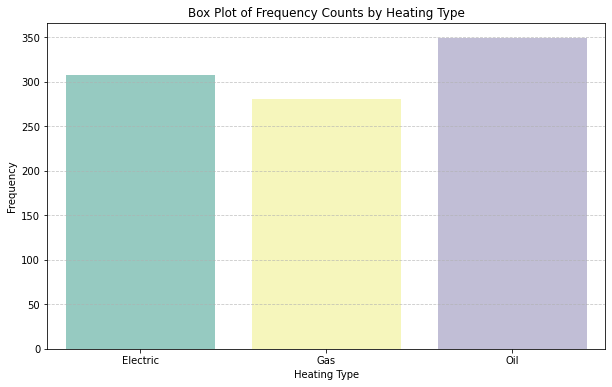

In [17]:
#UNIVARIATE ANALYSIS

#Bar plot for frequency of heating types.

frequency = non_outliers_data['HeatingType'].value_counts().sort_index()
#print(frequency)
location_freq = pd.DataFrame({'HeatingType': frequency.index, 'Frequency': frequency.values})

plt.figure(figsize=(10, 6))
sns.barplot(x='HeatingType', y='Frequency', data=location_freq, palette='Set3')
plt.title('Box Plot of Frequency Counts by Heating Type')
plt.xlabel('Heating Type')
plt.ylabel('Frequency')
plt.xticks()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\Pepe\AppData\Local\Temp\ipykernel_504\2216572060.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Location', y='Frequency', data=location_freq, palette='Set3')


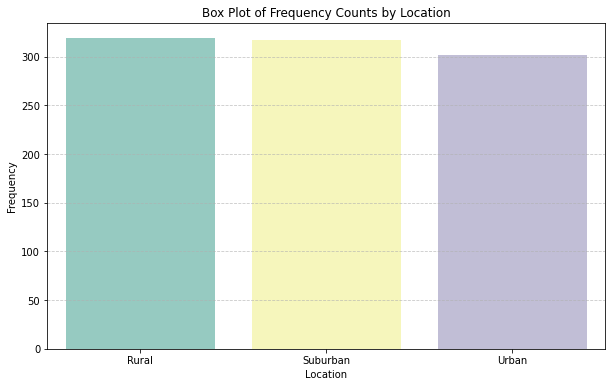

In [18]:
#UNIVARIATE ANALYSIS

#Bar plot for frequency of location.

frequency = non_outliers_data['Location'].value_counts().sort_index()
#print(frequency)
location_freq = pd.DataFrame({'Location': frequency.index, 'Frequency': frequency.values})

plt.figure(figsize=(10, 6))
sns.barplot(x='Location', y='Frequency', data=location_freq, palette='Set3')
plt.title('Box Plot of Frequency Counts by Location')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.xticks()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [19]:
def calculate_mic(df):
    mine = minepy.MINE(alpha=0.6, c=15)
    mic_matrix = pd.DataFrame(index=df.columns, columns=df.columns)

    for i in df.columns:
        for j in df.columns:
            if i == j:
                mic_matrix.loc[i, j] = 1.0
            else:
                mine.compute_score(df[i], df[j])
                mic_matrix.loc[i, j] = mine.mic()

    return mic_matrix

# Calculate MIC matrix
mic_matrix = calculate_mic(num_preprocessed)

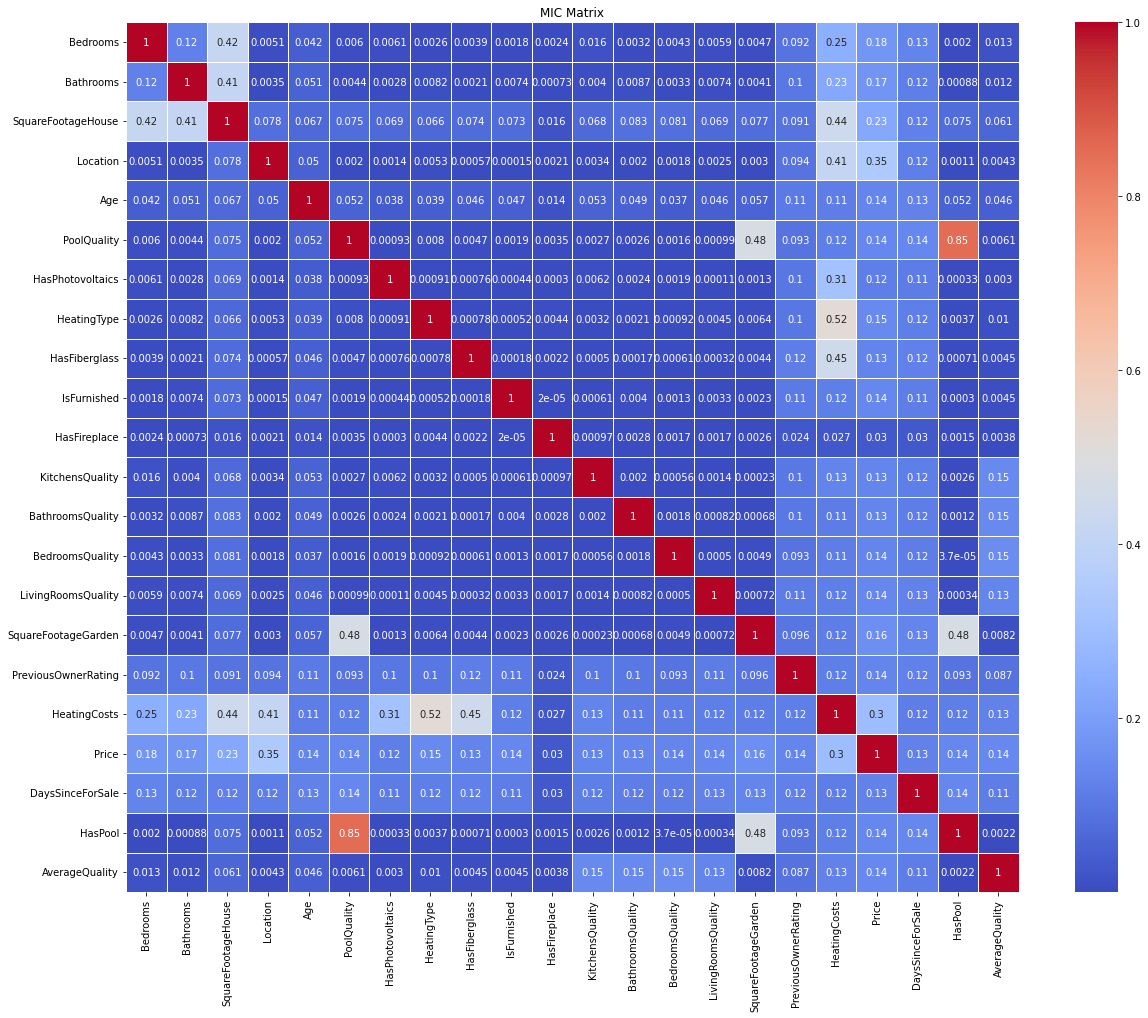

In [43]:
# Convert MIC values to float for heatmap
mic_matrix = mic_matrix.astype(float)

# Plot heatmap of MIC matrix
plt.figure(figsize=(20, 16))
sns.heatmap(mic_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('MIC Matrix')
plt.show()

Correlation coefficients:
 Bedrooms               0.071508
Bathrooms              0.100097
SquareFootageHouse    -0.009228
Location              -0.043742
Age                   -0.054170
PoolQuality            0.056054
HasPhotovoltaics      -0.023459
HeatingType           -0.036831
HasFiberglass          0.012246
IsFurnished            0.032353
HasFireplace          -0.001321
KitchensQuality       -0.006844
BathroomsQuality       0.030982
BedroomsQuality       -0.012971
LivingRoomsQuality    -0.034087
SquareFootageGarden    0.090951
PreviousOwnerRating    0.011944
HeatingCosts          -0.003374
DaysSinceForSale       0.002137
HasPool                0.034446
AverageQuality        -0.012121
dtype: float64


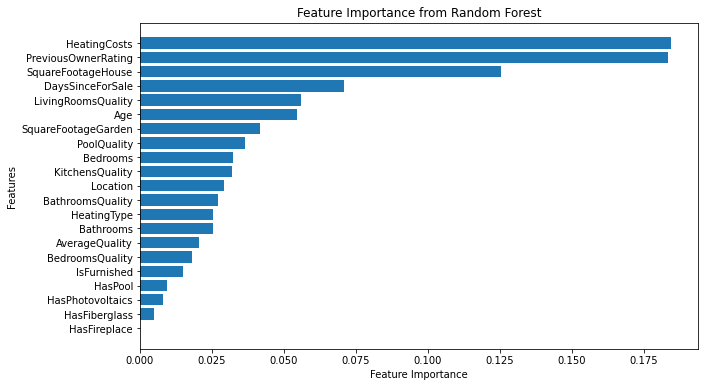

Selected features by RFE: Index(['Bedrooms', 'SquareFootageHouse', 'Age', 'PoolQuality',
       'BathroomsQuality', 'LivingRoomsQuality', 'SquareFootageGarden',
       'PreviousOwnerRating', 'HeatingCosts', 'DaysSinceForSale'],
      dtype='object')


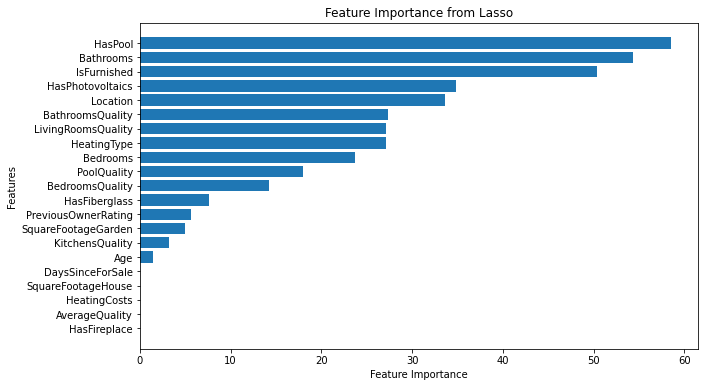

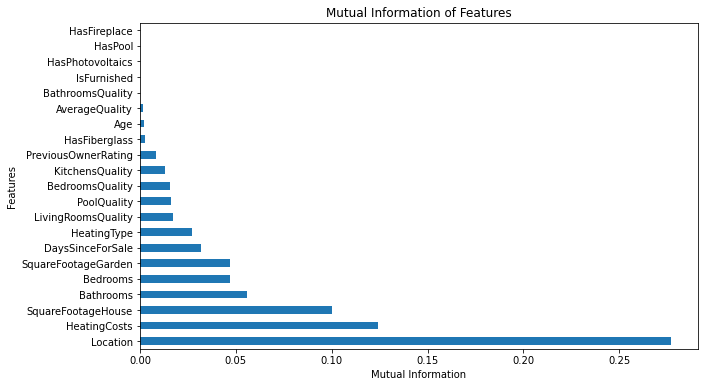

In [21]:
# Assume df is your DataFrame and target is the target variable
df = num_preprocessed.copy()
X = df.drop('Price', axis=1)
y = df['Price']

# Correlation Analysis
correlations = X.corrwith(y)
print("Correlation coefficients:\n", correlations)

# Feature Importance from Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
feature_importances = rf.feature_importances_

def sorted_plot(columns, importances, title):
    # Plotting feature importances
    importance_df = pd.DataFrame({
        'Feature': columns,
        'Importance': importances
    })

    # Sort the DataFrame by importance values in ascending order
    importance_df = importance_df.sort_values(by='Importance', ascending=True)

    # Plot the sorted feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'])
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title(title)
    plt.show()

sorted_plot(X.columns, feature_importances, 'Feature Importance from Random Forest')

# Recursive Feature Elimination with Random Forest
rfe = RFE(estimator=rf, n_features_to_select=10)
rfe.fit(X, y)
selected_features = X.columns[rfe.support_]
print("Selected features by RFE:", selected_features)

# Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X, y)
lasso_importances = np.abs(lasso.coef_)

# Plotting Lasso feature importances
sorted_plot(X.columns, lasso_importances, 'Feature Importance from Lasso')

# Mutual Information
mutual_info = mutual_info_regression(X, y)
mutual_info_series = pd.Series(mutual_info, index=X.columns)

# Plotting mutual information
plt.figure(figsize=(10, 6))
mutual_info_series.sort_values(ascending=False).plot.barh()
plt.xlabel('Mutual Information')
plt.ylabel('Features')
plt.title('Mutual Information of Features')
plt.show()

In [28]:
houses100 = preprocessed_data[preprocessed_data['Price'] <= 100]
houses100

,Bedrooms,Bathrooms,SquareFootageHouse,Location,Age,PoolQuality,HasPhotovoltaics,HeatingType,HasFiberglass,IsFurnished,...,BathroomsQuality,BedroomsQuality,LivingRoomsQuality,SquareFootageGarden,PreviousOwnerRating,HeatingCosts,Price,DaysSinceForSale,HasPool,AverageQuality
16,1.0,1.0,36.0,Suburban,54.0,0,0,Oil,0,1,...,0,2,1,14.0,1.84,56.000000,60.47630,1137,1,1.00
36,1.0,1.0,30.0,Rural,0.0,-1,0,Gas,0,0,...,1,1,1,6.0,3.03,103.820000,61.91122,632,0,0.75
48,2.0,2.0,134.0,Suburban,0.0,0,1,Electric,0,0,...,0,1,0,14.0,2.43,80.400000,99.48230,1599,1,0.25
49,1.0,2.0,88.0,Suburban,50.0,-1,0,Electric,0,1,...,0,1,1,16.0,2.71,52.800000,79.88437,1578,0,0.75
59,1.0,2.0,61.0,Suburban,0.0,-1,0,Gas,0,1,...,1,1,0,6.0,2.37,60.000000,55.07227,890,0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,1.0,1.0,44.0,Suburban,0.0,-1,0,Oil,0,1,...,2,2,0,6.0,3.05,68.800000,61.48053,177,0,1.50
955,1.0,1.0,33.0,Suburban,0.0,-1,0,Oil,1,0,...,0,1,2,6.0,2.83,49.600000,95.85632,203,0,1.00
956,1.0,1.0,92.0,Suburban,63.0,-1,1,Electric,1,1,...,1,2,1,6.0,3.64,104.610001,73.10897,1571,0,1.25
958,1.0,1.0,22.0,Suburban,34.0,-1,1,Oil,1,1,...,2,1,0,6.0,2.41,106.610001,76.54197,1357,0,1.00


In [38]:
houses100['SquareFootageGarden'].mean()

8.306569343065693

In [36]:
houses100['Age'].mean()

38.10948905109489

C:\Users\Pepe\AppData\Local\Temp\ipykernel_504\1003688192.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Location', y='Frequency', data=location_freq, palette='Set3')


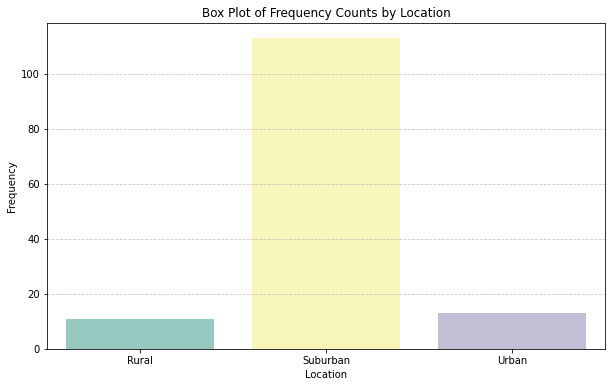

In [26]:
frequency = houses100['Location'].value_counts().sort_index()
#print(frequency)
location_freq = pd.DataFrame({'Location': frequency.index, 'Frequency': frequency.values})

plt.figure(figsize=(10, 6))
sns.barplot(x='Location', y='Frequency', data=location_freq, palette='Set3')
plt.title('Box Plot of Frequency Counts by Location')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.xticks()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [27]:
houses100['SquareFootageHouse'].mean()

172.5109489051095

C:\Users\Pepe\AppData\Local\Temp\ipykernel_504\2199886594.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='HeatingType', y='Frequency', data=location_freq, palette='Set3')


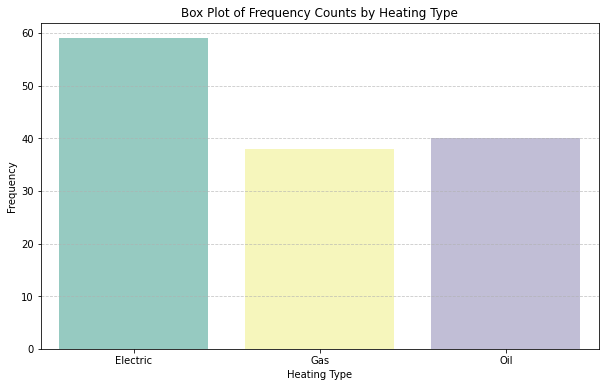

In [29]:
#Bar plot for frequency of heating types.

frequency = houses100['HeatingType'].value_counts().sort_index()
#print(frequency)
location_freq = pd.DataFrame({'HeatingType': frequency.index, 'Frequency': frequency.values})

plt.figure(figsize=(10, 6))
sns.barplot(x='HeatingType', y='Frequency', data=location_freq, palette='Set3')
plt.title('Box Plot of Frequency Counts by Heating Type')
plt.xlabel('Heating Type')
plt.ylabel('Frequency')
plt.xticks()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\Pepe\AppData\Local\Temp\ipykernel_504\2100032461.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IsFurnished', y='Frequency', data=location_freq, palette='Set3')


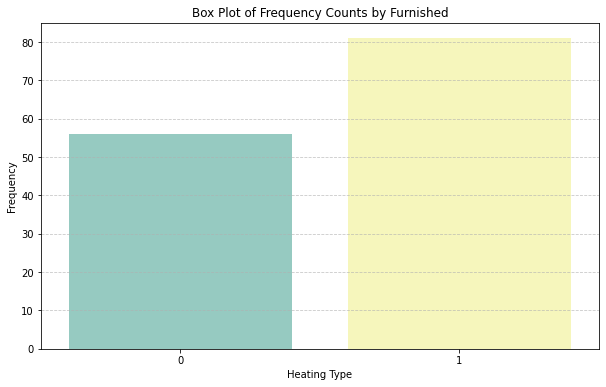

In [40]:
frequency = houses100['IsFurnished'].value_counts().sort_index()
#print(frequency)
location_freq = pd.DataFrame({'IsFurnished': frequency.index, 'Frequency': frequency.values})

plt.figure(figsize=(10, 6))
sns.barplot(x='IsFurnished', y='Frequency', data=location_freq, palette='Set3')
plt.title('Box Plot of Frequency Counts by Furnished')
plt.xlabel('Heating Type')
plt.ylabel('Frequency')
plt.xticks()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\Pepe\AppData\Local\Temp\ipykernel_504\287308054.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Bedrooms', y='Frequency', data=location_freq, palette='Set3')


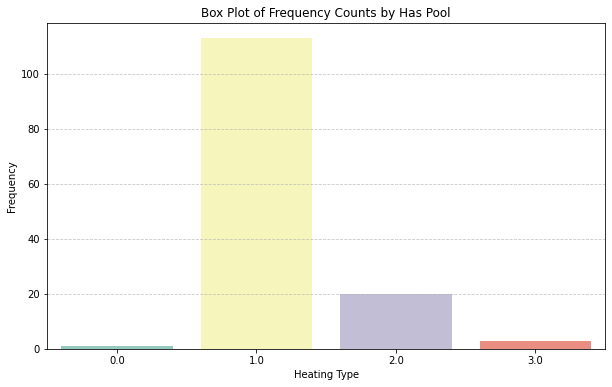

In [35]:
frequency = houses100['Bathrooms'].value_counts().sort_index()
#print(frequency)
location_freq = pd.DataFrame({'Bedrooms': frequency.index, 'Frequency': frequency.values})

plt.figure(figsize=(10, 6))
sns.barplot(x='Bedrooms', y='Frequency', data=location_freq, palette='Set3')
plt.title('Box Plot of Frequency Counts by Has Pool')
plt.xlabel('Heating Type')
plt.ylabel('Frequency')
plt.xticks()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\Pepe\AppData\Local\Temp\ipykernel_504\2542636177.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='HasPool', y='Frequency', data=location_freq, palette='Set3')


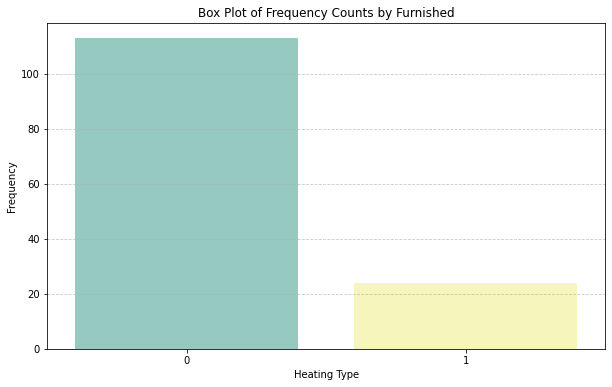

In [41]:
frequency = houses100['HasPool'].value_counts().sort_index()
#print(frequency)
location_freq = pd.DataFrame({'HasPool': frequency.index, 'Frequency': frequency.values})

plt.figure(figsize=(10, 6))
sns.barplot(x='HasPool', y='Frequency', data=location_freq, palette='Set3')
plt.title('Box Plot of Frequency Counts by Furnished')
plt.xlabel('Heating Type')
plt.ylabel('Frequency')
plt.xticks()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()